In [1]:
SEED = 42
from google.colab import drive
from google.colab import files

%tensorflow_version 1.x
import tensorflow as tf

!pip install bert-tensorflow
import bert
from bert import run_classifier

from bert import optimization
from bert import tokenization

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

TensorFlow 1.x selected.
     |████████████████████████████████| 71kB 2.1MB/s 



In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
file = '/content/gdrive/My Drive/Sentiment Analysis/Dataset.txt'
df = pd.read_csv(file, sep = '\t')
df

,Sentence,Label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


In [4]:
def get_data(a):
  sentence = list(a['Sentence'])
  label = list(a['Label'])
  raw_data_train = {'sentence': sentence, 'label': label}
  df = pd.DataFrame(raw_data_train, columns = ['sentence','label'])
  return df

train, test = train_test_split(df, test_size=0.20,random_state = SEED,shuffle = True)
train_data = get_data(train)
test_data = get_data(test)

print(train_data[0:3])
print(test_data[0:3])

                                            sentence  label
0  I've seen soap operas more intelligent than th...      0
1         Never had anything to complain about here.      1
2                            Highly unrecommended.        0
                                            sentence  label
0  It's close to my house, it's low-key, non-fanc...      1
1  If you stay in Vegas you must get breakfast he...      1
2  Let's start with all the problemsthe acting, ...      0


In [5]:
!wget https://storage.googleapis.com/bert_models/2018_10_18/cased_L-12_H-768_A-12.zip
!unzip cased_L-12_H-768_A-12.zip

--2020-07-04 11:21:29--  https://storage.googleapis.com/bert_models/2018_10_18/cased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.211.128, 173.194.215.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.211.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 404261442 (386M) [application/zip]
Saving to: ‘cased_L-12_H-768_A-12.zip’

cased_L-12_H-768_A- 100%[===================>] 385.53M   147MB/s    in 2.6s    

2020-07-04 11:21:31 (147 MB/s) - ‘cased_L-12_H-768_A-12.zip’ saved [404261442/404261442]

Archive:  cased_L-12_H-768_A-12.zip
   creating: cased_L-12_H-768_A-12/
  inflating: cased_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: cased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: cased_L-12_H-768_A-12/vocab.txt  
  inflating: cased_L-12_H-768_A-12/bert_model.ckpt.index  
  inflating: cased_L-12_H-768_A-12/bert_config.json  


In [6]:
label_list = [0,1]

train_InputExamples = train_data.apply(lambda x: bert.run_classifier.InputExample(guid=None, # Globally unique ID - unused
                                                                                           text_a = x['sentence'],  
                                                                                           label = x['label']), axis = 1)

test_InputExamples = test_data.apply(lambda x: bert.run_classifier.InputExample(guid=None, # Globally unique ID - unused
                                                                                           text_a = x['sentence'],  
                                                                                           label = x['label']), axis = 1)

In [7]:
vocab_file = "cased_L-12_H-768_A-12/vocab.txt"

def create_tokenizer_from_hub_module():
  return bert.tokenization.FullTokenizer(vocab_file=vocab_file, do_lower_case=True)

tokenizer = create_tokenizer_from_hub_module()
# Check Tokenizer
print(tokenizer.tokenize("how are you"))


['how', 'are', 'you']


In [8]:
# Convert train and test features to InputFeatures that BERT understands.
MAX_SEQ_LENGTH = 128
train_features = bert.run_classifier.convert_examples_to_features(train_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)
test_features = bert.run_classifier.convert_examples_to_features(test_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)


INFO:tensorflow:Writing example 0 of 2198
INFO:tensorflow:*** Example ***
INFO:tensorflow:guid: None
INFO:tensorflow:tokens: [CLS] i ' ve seen soap operas more intelligent than this movie . [SEP]
INFO:tensorflow:input_ids: 101 178 112 1396 1562 8439 15441 1167 9998 1190 1142 2523 119 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [9]:
# Classification Model
def create_model(bert_config, is_training, input_ids, input_mask, segment_ids, labels, num_labels, use_one_hot_embeddings):
  """Creates a classification model."""
  model = bert.run_classifier.modeling.BertModel(config=bert_config,
                                                 is_training=is_training,
                                                 input_ids=input_ids,
                                                 input_mask=input_mask,
                                                 token_type_ids=segment_ids,
                                                 use_one_hot_embeddings=use_one_hot_embeddings)
  #Sizes
  output_layer = model.get_pooled_output()
  hidden_size = output_layer.shape[-1].value
  
  #Trainable Parameters
  output_weights = tf.get_variable("output_weights", [num_labels, hidden_size], initializer=tf.truncated_normal_initializer(stddev=0.02))
  output_bias = tf.get_variable("output_bias", [num_labels], initializer=tf.zeros_initializer())

  with tf.variable_scope("loss"):
    if is_training:
      output_layer = tf.nn.dropout(output_layer, keep_prob=0.9)  # dropout = 0.1 

    logits = tf.matmul(output_layer, output_weights, transpose_b=True)
    logits = tf.nn.bias_add(logits, output_bias)
    probabilities = tf.nn.softmax(logits, axis=-1)
    log_probs = tf.nn.log_softmax(logits, axis=-1)
    predicted_labels = tf.squeeze(tf.argmax(log_probs, axis=-1, output_type=tf.int32))

    one_hot_labels = tf.one_hot(labels, depth=num_labels, dtype=tf.float32)
    per_example_loss = -tf.reduce_sum(one_hot_labels * log_probs, axis=-1)
    loss = tf.reduce_mean(per_example_loss)

    return (loss, per_example_loss, logits, probabilities,predicted_labels,output_layer)


def model_fn_builder(bert_config, num_labels, init_checkpoint, learning_rate, num_train_steps, num_warmup_steps, use_tpu, use_one_hot_embeddings):
  """Returns `model_fn` closure for TPUEstimator."""

  def model_fn(features, labels, mode, params):  # pylint: disable=unused-argument
    """The `model_fn` for TPUEstimator."""
    tf.logging.info("*** Features ***")
    for name in sorted(features.keys()):
      tf.logging.info("  name = %s, shape = %s" % (name, features[name].shape))

    input_ids = features["input_ids"]
    input_mask = features["input_mask"]
    segment_ids = features["segment_ids"]
    label_ids = features["label_ids"]
    is_real_example = None
    if "is_real_example" in features:
      is_real_example = tf.cast(features["is_real_example"], dtype=tf.float32)
    else:
      is_real_example = tf.ones(tf.shape(label_ids), dtype=tf.float32)
    is_training = (mode == tf.estimator.ModeKeys.TRAIN)

    (total_loss, per_example_loss, logits, probabilities,predicted_labels,hidden_context) = create_model(bert_config, 
                                                                                                         is_training, 
                                                                                                         input_ids, 
                                                                                                         input_mask, 
                                                                                                         segment_ids, 
                                                                                                         label_ids,
                                                                                                         num_labels, 
                                                                                                         use_one_hot_embeddings)
    tvars = tf.trainable_variables()
    initialized_variable_names = {}
    scaffold_fn = None
    if init_checkpoint:
      (assignment_map, initialized_variable_names) = bert.run_classifier.modeling.get_assignment_map_from_checkpoint(tvars, init_checkpoint)
      if use_tpu:
        def tpu_scaffold():
          tf.train.init_from_checkpoint(init_checkpoint, assignment_map)
          return tf.train.Scaffold()
        scaffold_fn = tpu_scaffold
      else:
        tf.train.init_from_checkpoint(init_checkpoint, assignment_map)

    output_spec = None
    
    if mode == tf.estimator.ModeKeys.TRAIN:
      train_op = optimization.create_optimizer(total_loss, learning_rate, num_train_steps, num_warmup_steps, use_tpu)
      output_spec = tf.estimator.EstimatorSpec(mode=mode, loss=total_loss, train_op=train_op)
    elif mode == tf.estimator.ModeKeys.EVAL:
      def metric_fn(per_example_loss, label_ids, logits, is_real_example):
        predictions = tf.argmax(logits, axis=-1, output_type=tf.int32)
        accuracy = tf.metrics.accuracy(labels=label_ids, predictions=predictions, weights=is_real_example)
        loss = tf.metrics.mean(values=per_example_loss, weights=is_real_example)
        return {"eval_accuracy": accuracy, "eval_loss": loss}
      eval_metrics = metric_fn(per_example_loss, label_ids, logits, is_real_example)
      output_spec = tf.estimator.EstimatorSpec(mode=mode, loss=total_loss, eval_metric_ops=eval_metrics)
    else:
      output_spec = tf.estimator.EstimatorSpec(mode=mode, 
                                               predictions={"probabilities": probabilities,"labels": predicted_labels, "hidden_context": hidden_context})
    return output_spec
  return model_fn

In [10]:
#Input Functions
def input_fn_builder(features, hidden_context, seq_length, is_training, drop_remainder):
  """Creates an `input_fn` closure to be passed to TPUEstimator."""

  all_input_ids = []
  all_input_mask = []
  all_segment_ids = []
  all_label_ids = []

  for feature in features:
    all_input_ids.append(feature.input_ids)
    all_input_mask.append(feature.input_mask)
    all_segment_ids.append(feature.segment_ids)
    all_label_ids.append(feature.label_id)

  def input_fn(params):
    """The actual input function."""
    batch_size = params["batch_size"]
    num_examples = len(features)
    hidden_shape = hidden_context.shape[-1]
    d = tf.data.Dataset.from_tensor_slices({"input_ids": tf.constant(all_input_ids, shape=[num_examples, seq_length], dtype=tf.int32),
                                            "input_mask": tf.constant(all_input_mask, shape=[num_examples, seq_length], dtype=tf.int32),
                                            "segment_ids": tf.constant(all_segment_ids, shape=[num_examples, seq_length], dtype=tf.int32),
                                            "label_ids": tf.constant(all_label_ids, shape=[num_examples], dtype=tf.int32),
                                            "hidden_context": tf.constant(hidden_context, shape = [num_examples,hidden_shape], dtype = tf.float32),
                                            })
    if is_training:
      d = d.repeat()
      d = d.shuffle(buffer_size=100)

    d = d.batch(batch_size=batch_size, drop_remainder=drop_remainder)
    return d
  return input_fn

In [11]:
# Trainer Function

Epochs = 5 # Number of Training Epochs 

def train(output_dir,input_fn):
  CONFIG_FILE = "cased_L-12_H-768_A-12/bert_config.json"
  INIT_CHECKPOINT = "cased_L-12_H-768_A-12/bert_model.ckpt"

  BATCH_SIZE = 28
  LEARNING_RATE = 2e-5
  NUM_TRAIN_EPOCHS = Epochs
  WARMUP_PROPORTION = 0.1 # Warmup is a period of time where hte learning rate is small and gradually increases--usually helps training.
  # Model configs
  SAVE_CHECKPOINTS_STEPS = 6000
  SAVE_SUMMARY_STEPS = 100
  OUTPUT_DIR = output_dir
  # Compute train and warmup steps from batch size
  num_train_steps = int(len(input_fn) / BATCH_SIZE * NUM_TRAIN_EPOCHS)
  num_warmup_steps = int(num_train_steps * WARMUP_PROPORTION)
  print(num_train_steps)
  run_config = tf.estimator.RunConfig(model_dir=OUTPUT_DIR,save_summary_steps=SAVE_SUMMARY_STEPS,save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)

  # Specify outpit directory and number of checkpoint steps to save
  model_fn = model_fn_builder(bert_config=bert.run_classifier.modeling.BertConfig.from_json_file(CONFIG_FILE),
                              num_labels=4, #number of unique labels
                              init_checkpoint=INIT_CHECKPOINT,
                              learning_rate=LEARNING_RATE,
                              num_train_steps=num_train_steps,
                              num_warmup_steps=num_warmup_steps,
                              use_tpu=False,
                              use_one_hot_embeddings=False)

  estimator = tf.estimator.Estimator(model_fn=model_fn, config=run_config, params={"batch_size": BATCH_SIZE})
  train_input_fn = bert.run_classifier.input_fn_builder(features=input_fn, seq_length=MAX_SEQ_LENGTH, is_training=True, drop_remainder=False)

  print(f'Beginning Training!')
  %timeit

  estimator.train(input_fn=train_input_fn, max_steps=num_train_steps)
  return estimator

In [12]:
#Evaluation Function
def evaluate(estimator,input_fn_for_test):
  MAX_SEQ_LENGTH = 128
  test_input_fn = run_classifier.input_fn_builder(features=input_fn_for_test,seq_length=MAX_SEQ_LENGTH,is_training=False,drop_remainder=False)
  
  actual_labels = []
  for i in test_data['label']:
    actual_labels.append(i)
  res = estimator.predict(test_input_fn)
  predicted_labels = []
  for i in res:
    predicted_labels.append(i['labels'])

  estimator.evaluate(input_fn=test_input_fn, steps=None)
  return actual_labels,predicted_labels

In [13]:
# Train
estimator = train('out_dir_train', train_features)

392
INFO:tensorflow:Using config: {'_model_dir': 'out_dir_train', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 6000, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f72937dc6a0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Beginning Training!
Instructions for updating:
Use Variable.read_value. Variables in 2.X are

In [14]:
# Evaluate
act_lab, pred_lab = evaluate(estimator, test_features)

np.array(act_lab).dump(open('Actual_labels.npy', 'wb'))
np.array(pred_lab).dump(open('Predicted_labels.npy', 'wb'))

y_true = list(np.load('Actual_labels.npy', allow_pickle=True))
y_pred = list(np.load('Predicted_labels.npy', allow_pickle=True))
target_names = ['Negetive', 'Postitive']
print(classification_report(y_true, y_pred, target_names=target_names))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:*** Features ***
INFO:tensorflow:  name = input_ids, shape = (?, 128)
INFO:tensorflow:  name = input_mask, shape = (?, 128)
INFO:tensorflow:  name = label_ids, shape = (?,)
INFO:tensorflow:  name = segment_ids, shape = (?, 128)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from out_dir_train/model.ckpt-392
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:*** Features ***
INFO:tensorflow:  name = input_ids, shape = (?, 128)
INFO:tensorflow:  name = input_mask, shape = (?, 128)
INFO:tensorflow:  name = label_ids, shape = (?,)
INFO:tensorflow:  name = segment_ids, shape = (?, 128)
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-07-04T11:27:58Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from out_dir_train/model.ckpt-392
INFO:te

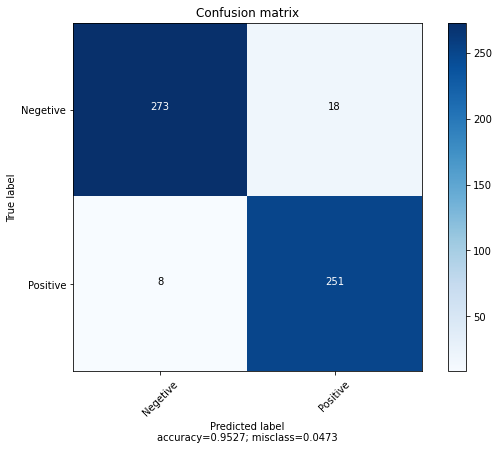

In [19]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import itertools

target_names = ['Negetive','Positive']
cm = confusion_matrix(y_true, y_pred)
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

plot_confusion_matrix(cm, target_names)